Реализовать функцию визуализации последовательности полигонов, представленной в виде итератора (например, можно использовать визуализацию с помощью библиотеки matplotlib, см. пример: ссылка)

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import itertools
import numpy as np
import math

Реализовать функцию визуализации последовательности полигонов, представленной в виде итератора (например, можно использовать визуализацию с помощью библиотеки matplotlib, см. пример: ссылка).

In [117]:
def visualize_polygons(polygons, margin=1):
    fig, ax = plt.subplots()
    lst = []
    for polygon in polygons:
        if all(np.isfinite(coord) for point in polygon for coord in point):
            patch = patches.Polygon(polygon, closed=True, fill=None, edgecolor='purple')
            ax.add_patch(patch)
            lst.append(polygon)
    if lst:
        x_min = min((min(x for x, y in coordinates) for coordinates in lst), default=np.inf)
        x_max = max((max(x for x, y in coordinates) for coordinates in lst), default=-np.inf)
        y_min = min((min(y for x, y in coordinates) for coordinates in lst), default=np.inf)
        y_max = max((max(y for x, y in coordinates) for coordinates in lst), default=-np.inf)
        ax.set_xlim(min(x_min, y_min)-margin, max(x_max, y_max)+margin)
        ax.set_ylim(min(x_min, y_min)-margin, max(x_max, y_max)+margin)
        plt.grid(True, linestyle=':')
        plt.show()
    else:
        print('Нет полигонов для визуализации')

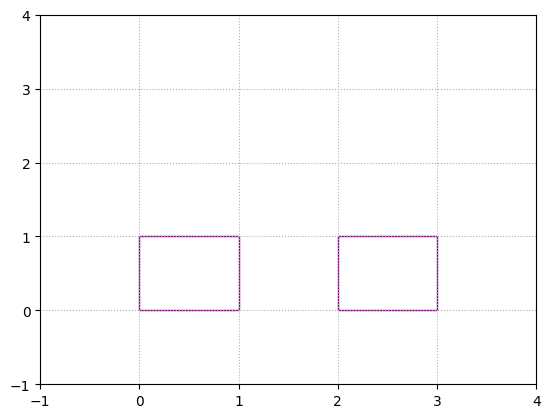

In [118]:
visualize_polygons([((0, 0), (1, 0), (1, 1), (0, 1)), ((2, 0), (3, 0), (3, 1), (2, 1))])

Реализовать функции, генерирующие бесконечную последовательность непересекающихся полигонов с различающимися координатами (например, «ленту», см. рис. 2):

прямоугольников (gen_rectangle);

In [162]:
def gen_rectangle(start_x, start_y, width, height, gap_x=1):
    x, y = start_x, start_y
    while True:
        yield ((x, y), (x + width, y), (x + width, y + height), (x, y + height))
        x += width + gap_x

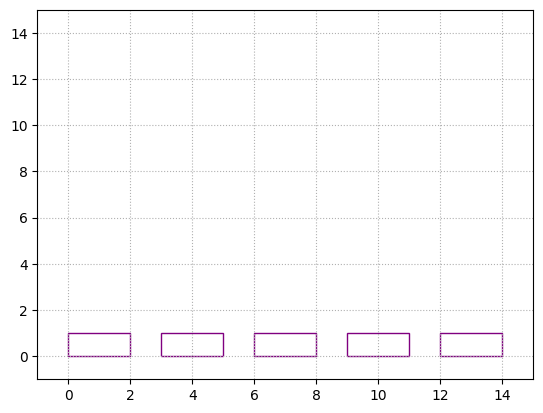

In [164]:
rectangles = gen_rectangle(0, 0, 2, 1, 1)
visualize_polygons(itertools.islice(rectangles, 5))

треугольников (gen_triangle);

In [165]:
def gen_triangle(start_x, start_y, base, height, gap_x=1):
    x = start_x
    while True:
        yield ((x, start_y), (x + base / 2, start_y + height), (x + base, start_y))
        x += base + gap_x

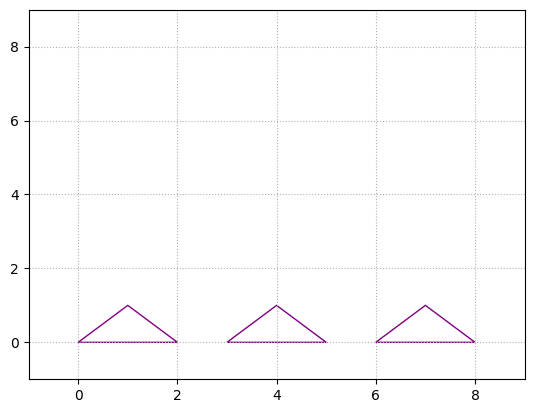

In [166]:
triangles = gen_triangle(0, 0, 2, 1)
visualize_polygons(itertools.islice(triangles, 3))

правильных шестиугольников (gen_hexagon).

In [300]:
def gen_hexagon(start_x, start_y, side_length, gap_x=1):
    def create_hexagon(x, y):
        angle = math.pi / 3
        return tuple((x + side_length * math.cos(angle * i), y + side_length * math.sin(angle * i)) for i in range(6))

    n = 1
    while True:
        x_offset = (2 * side_length + gap_x) * n
        n += 1
        yield create_hexagon(start_x + x_offset, start_y)

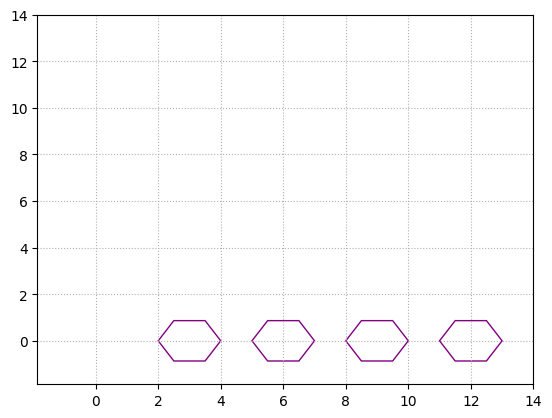

In [301]:
hexagons = gen_hexagon(0, 0, 1)
visualize_polygons(itertools.islice(hexagons, 4))

с помощью данных функций используя функции из модуля itertools сгенерировать семь фигур, включающих как прямоугольники, так и треугольники и шестиугольники, визуализировать результат.

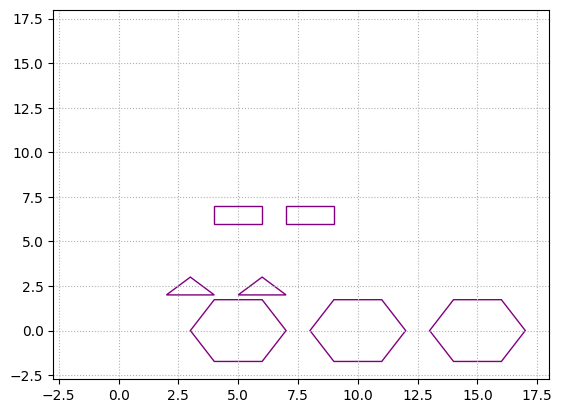

In [257]:
triangles = gen_triangle(2, 2, 2, 1)
hexagons = gen_hexagon(0, 0, 2)
rectangles = gen_rectangle(4, 6, 2, 1)

shapes = itertools.chain(itertools.islice(triangles, 2), itertools.islice(hexagons, 3), rectangles)
first_seven_shapes = list(itertools.islice(shapes, 7))

visualize_polygons(first_seven_shapes)

3. Реализовать операции:
параллельный перенос (tr_translate);

поворот (tr_rotate);

симметрия (tr_symmetry);

гомотетия (tr_homothety);

которые можно применить к последовательности полигонов с помощью функции map.

которые можно применить к последовательности полигонов с помощью функции map.

In [169]:
def apply_transformations(polygons, transform_fn):
    return map(transform_fn, polygons)

Реализовать операции: параллельный перенос (tr_translate);

In [170]:
def tr_translate(polygon, dx, dy):
    return tuple((x + dx, y + dy) for x, y in polygon)

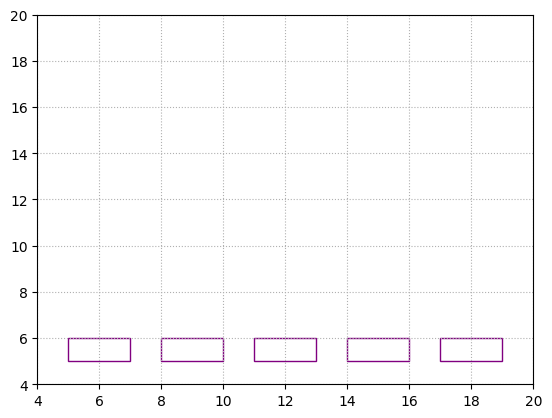

In [172]:
rectangles = gen_rectangle(0, 0, 2, 1, 1)
translated_rectangles = apply_transformations(itertools.islice(rectangles, 5), lambda p: tr_translate(p, 5, 5))
visualize_polygons(translated_rectangles)

поворот (tr_rotate);

In [173]:
def tr_rotate(polygon, angle):
    cos_theta = math.cos(math.radians(angle))
    sin_theta = math.sin(math.radians(angle))
    def rotate_point(x, y):
        return (x * cos_theta - y * sin_theta, x * sin_theta + y * cos_theta)
    return tuple(rotate_point(x, y) for x, y in polygon)

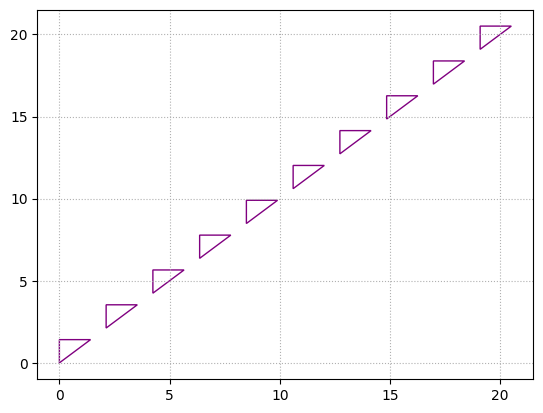

In [174]:
triangles = gen_triangle(0, 0, 2, 1, 1)
rotated_triangles = apply_transformations(itertools.islice(triangles, 10), lambda p: tr_rotate(p, 45))
visualize_polygons(rotated_triangles)

симметрия (tr_symmetry);

In [175]:
def tr_symmetry(polygon, axis='x'):
    if axis == 'x':
        return tuple((x, -y) for x, y in polygon)
    elif axis == 'y':
        return tuple((-x, y) for x, y in polygon)
    elif axis == 'xy':
        return tuple((y, x) for x, y in polygon)  
    elif axis == 'oxy':
        return tuple((-x, -y) for x, y in polygon)
    else:
        raise ValueError("Неверная ось симметрии. Используйте 'x', 'y', 'xy' или 'oxy'.")

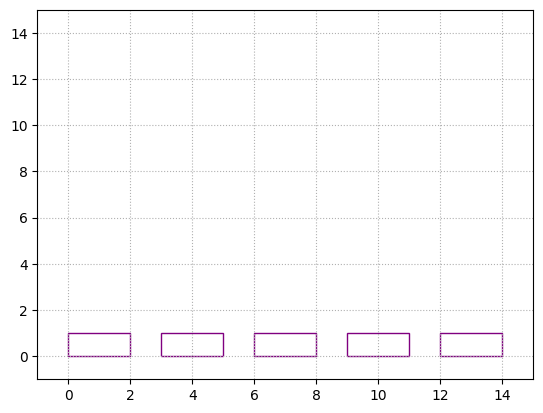

In [178]:
rectangles = gen_rectangle(0, 0, 2, 1, 1)
visualize_polygons(itertools.islice(rectangles, 5))

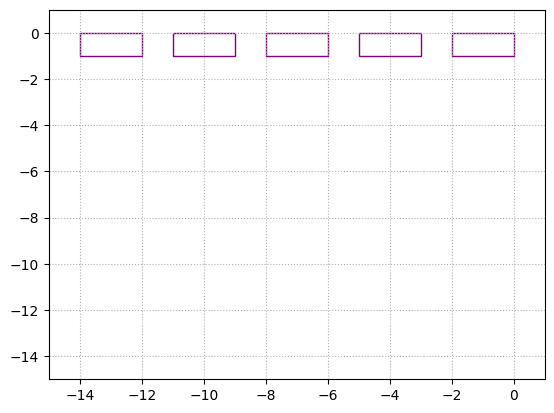

In [179]:
rectangles = gen_rectangle(0, 0, 2, 1, 1)
symmetrical_rectangles = apply_transformations(itertools.islice(rectangles, 5), lambda p: tr_symmetry(p, 'oxy'))
visualize_polygons(symmetrical_rectangles)

гомотетия (tr_homothety);

In [180]:
def tr_homothety(polygon, k):
    return tuple((x * k, y * k) for x, y in polygon)

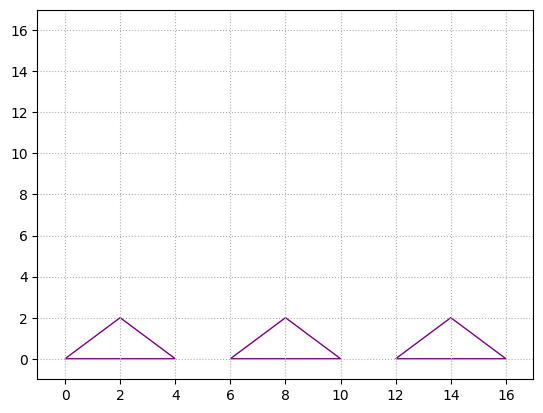

In [181]:
triangles = gen_triangle(0, 0, 2, 1, 1)
homothetic_triangles = apply_transformations(itertools.islice(triangles, 3), lambda p: tr_homothety(p, 2))
visualize_polygons(homothetic_triangles)

4. С помощью данных функций создать и визуализировать (рис. 3):
три параллельных «ленты» из последовательностей полигонов, расположенных под острым углом к оси абсцисс;

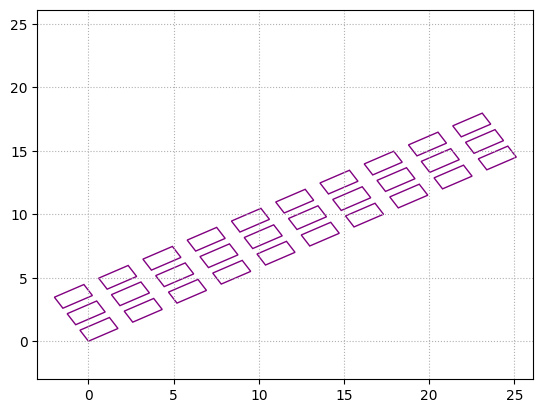

In [185]:
def gen_parallel_rectangles(start_x, start_y, width, height, angle, num_lanes, gap_x=1, gap_y=0.5):
    lanes = []
    for i in range(num_lanes):
        rectangles = gen_rectangle(start_x, start_y + i * (height + gap_y), width, height, gap_x)
        rotated_rectangles = apply_transformations(rectangles, lambda p: tr_rotate(p, angle))
        lanes.append(rotated_rectangles)
    return lanes

lanes = gen_parallel_rectangles(0, 0, 2, 1, 30, 3)

polygons = itertools.chain(*[itertools.islice(lane, 10) for lane in lanes])
visualize_polygons(polygons)

две пересекающихся «ленты» из последовательностей полигонов, пересекающихся не в начале координат;

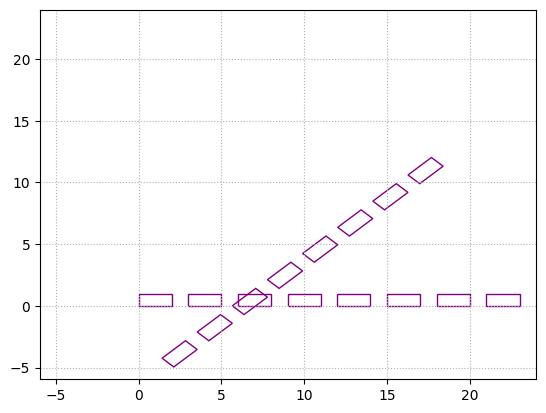

In [188]:
rectangles1 = gen_rectangle(0, 0, 2, 1, 1)
rectangles2 = apply_transformations(gen_rectangle(-2, -5, 2, 1, 1), lambda p: tr_rotate(p, 45))

figures = itertools.chain(itertools.islice(rectangles1, 8), itertools.islice(rectangles2, 8))

visualize_polygons(figures)

две параллельных ленты треугольников, ориентированных симметрично друг к другу;

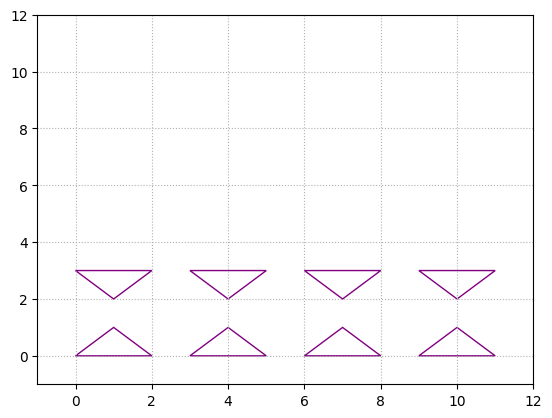

In [189]:
triangles1 = gen_triangle(0, 0, 2, 1, 1)
triangles2 = apply_transformations(gen_triangle(0, -3, 2, 1, 1), lambda p: tr_symmetry(p, 'x'))

figures = itertools.chain(itertools.islice(triangles1, 4), itertools.islice(triangles2, 4))

visualize_polygons(figures)

последовательность четырехугольников в разном масштабе, ограниченных двумя прямыми, пересекающимися в начале координат.

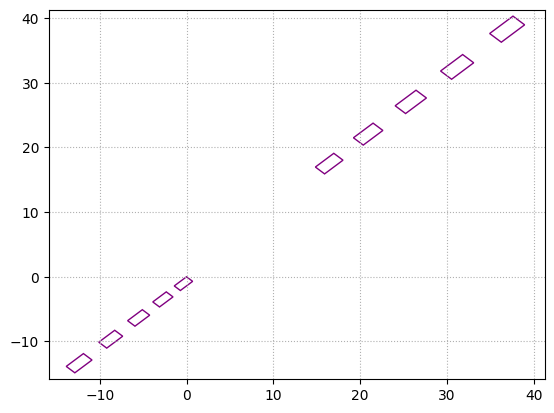

In [190]:
rectangles = gen_rectangle(0, 0, 2, 1)

scaled_rectangles = apply_transformations(itertools.islice(rectangles, 10), lambda p, idx=itertools.count(): tr_homothety(p, 1 + next(idx) * 0.1))

rotated_rectangles = apply_transformations(itertools.islice(scaled_rectangles, 10), lambda p: tr_rotate(p, 45))

symmetrical_rectangles = apply_transformations(itertools.islice(rotated_rectangles, 5), lambda p: tr_symmetry(p, 'oxy'))

all_rectangles = itertools.chain(symmetrical_rectangles, rotated_rectangles)

visualize_polygons(all_rectangles)

Нет полигонов для визуализации


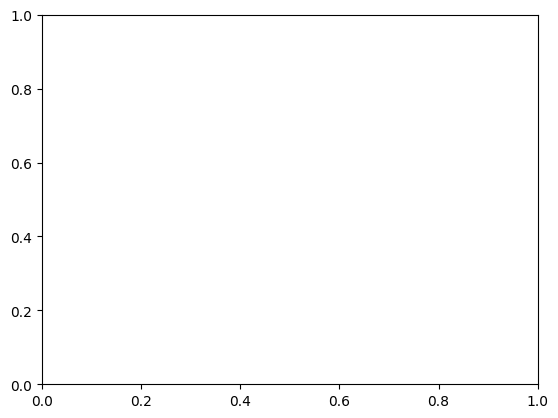

In [192]:
rectangles = gen_rectangle(0, 0, 2, 1, 0)

scaled_rectangles = apply_transformations(itertools.islice(rectangles, 10), lambda p, idx=itertools.count(): tr_homothety(p, 1 + next(idx) * 0.1))

limited_rectangles = filter(lambda p: all(y >= x for x, y in p) and all(y <= -x for x, y in p), scaled_rectangles)

visualize_polygons(limited_rectangles)

5.	Реализовать операции:

* фильтрации фигур, являющихся выпуклыми многоугольниками (`flt_convex_polygon`);

* фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой (`flt_angle_point`);

* фильтрации фигур, имеющих площадь меньше заданной (`flt_square`);

* фильтрации фигур, имеющих кратчайшую сторону меньше заданного значения (`flt_short_side`);

* фильтрации выпуклых многоугольников, включающих заданную точку (внутри многоугольника) (`flt_point_inside`);

* фильтрации выпуклых многоугольников, включающих любой из углов заданного многоугольника (`flt_polygon_angles_inside`);

которые можно применить к последовательности полигонов с помощью функции `filter`.

фильтрации фигур, являющихся выпуклыми многоугольниками (flt_convex_polygon);

In [193]:
def is_convex(polygon):
    def vektorn_proizv_sign(p1, p2, p3):
        x1, y1 = p1
        x2, y2 = p2
        x3, y3 = p3
        return (x2 - x1) * (y3 - y1) - (y2 - y1) * (x3 - x1)

    signs = []
    for i in range(len(polygon)):
        signs.append(math.copysign(1, vektorn_proizv_sign(polygon[i], polygon[(i + 1) % len(polygon)], polygon[(i + 2) % len(polygon)])))

    return all(s == signs[0] for s in signs)

def flt_convex_polygon(polygons):
    return filter(is_convex, polygons)

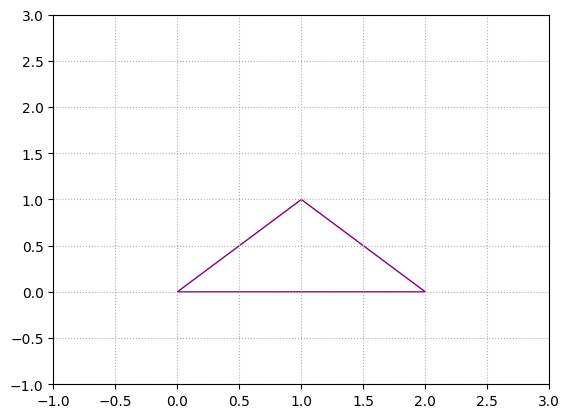

In [230]:
polygons = [((0, 0), (-1, 0), (0.5, 0.5), (0, 1)), ((0, 0), (2, 0), (1, 1))]

convex_polygons = flt_convex_polygon(polygons)
visualize_polygons(convex_polygons)

фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой (flt_angle_point);

In [195]:
def flt_angle_point(polygons, point):
    return filter(lambda p: point in p, polygons)

Многоугольники с углом в заданной тояке:
[[(0, 0), (3, 0), (3, 2), (0, 2)]]


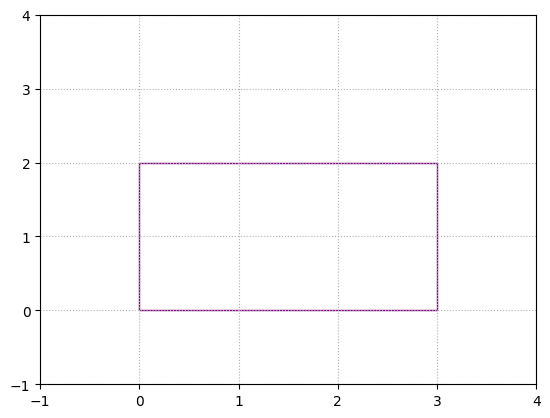

In [206]:
rectangles = [(0, 0), (3, 0), (3, 2), (0, 2)]
triangles = [(4, 0), (6, 2), (5, 3)]


filtered = list(flt_angle_point([rectangles, triangles], (0, 0)))
print("Многоугольники с углом в заданной тояке:")
print(filtered)
visualize_polygons(filtered)

фильтрации фигур, имеющих площадь меньше заданной (flt_square);

In [196]:
def polygon_area(polygon):
    return 0.5 * abs(sum(x0 * y1 - x1 * y0 for (x0, y0), (x1, y1) in zip(polygon, polygon[1:] + polygon[:1])))

def flt_square(polygons, min_area):
    return filter(lambda p: polygon_area(p) >= min_area, polygons)

Многоугольников с площадью больше заданной: 6


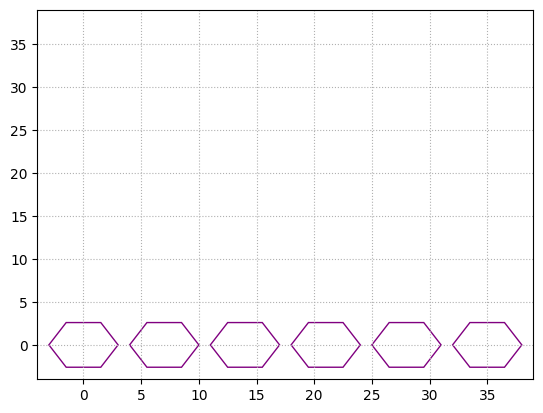

In [235]:
hexagons = gen_hexagon(0, 0, 3)
large_hexagons = list(flt_square(itertools.islice(hexagons, 6), 3))
print(f"Многоугольников с площадью больше заданной: {len(large_hexagons)}")
visualize_polygons(large_hexagons)

фильтрации фигур, имеющих кратчайшую сторону меньше заданного значения (flt_short_side);

In [217]:
def polygon_shortest_side(polygon):
    distances = [math.hypot(x0 - x1, y0 - y1) for (x0, y0), (x1, y1) in zip(polygon, polygon[1:] + polygon[:1])]
    return min(distances)

def flt_short_side(polygons, min_length):
    return filter(lambda p: polygon_shortest_side(p) >= min_length, polygons)

Многоугольники с кратчайшей стороной больше заданного значения:


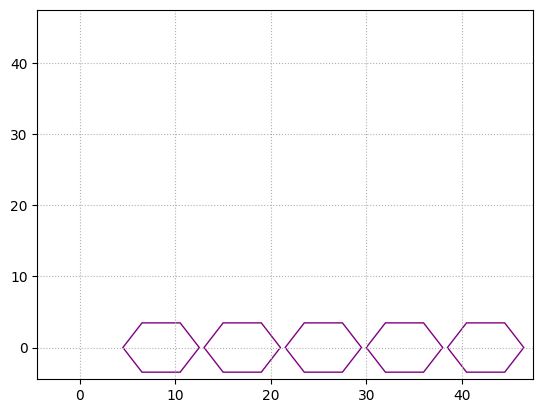

In [284]:
hexagons = gen_hexagon(0, 0, 4, 0.5)
short_side_hexagons = list(flt_short_side(itertools.islice(hexagons, 5), 1.5))
print("Многоугольники с кратчайшей стороной больше заданного значения:")
visualize_polygons(short_side_hexagons)

фильтрации выпуклых многоугольников, включающих заданную точку (внутри многоугольника) (flt_point_inside);

In [315]:
def point_in_polygon(polygon, point):
    px, py = point
    inside = False
    for (x0, y0), (x1, y1) in zip(polygon, polygon[1:] + polygon[:1]):
        if ((y0 > py) != (y1 > py)) and (px < (x1 - x0) * (py - y0) / (y1 - y0) + x0):
            inside = not inside
    return inside


def flt_point_inside(polygons, point):
    return filter(lambda p: is_convex(p) and point_in_polygon(p, point), polygons)

Фигуры, содержащие точку:


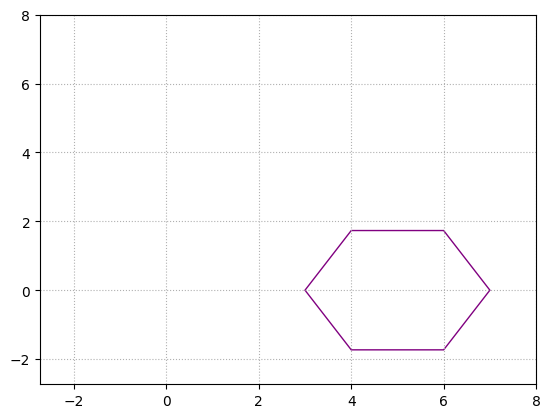

In [317]:
triangles = gen_triangle(2, 2, 2, 1)
hexagons = gen_hexagon(0, 0, 2)
rectangles = gen_rectangle(4, 6, 2, 1)

shapes = itertools.chain(itertools.islice(triangles, 2), itertools.islice(hexagons, 3), rectangles)
first_seven_shapes = list(itertools.islice(shapes, 7))

point = (5, 0)
point_inside_hexagons = list(flt_point_inside(first_seven_shapes, point))
print("Фигуры, содержащие точку:")
visualize_polygons(point_inside_hexagons)

фильтрации выпуклых многоугольников, включающих любой из углов заданного многоугольника (flt_polygon_angles_inside);

In [200]:
def point_in_polygon(polygon, point):
    px, py = point
    inside = False
    for (x0, y0), (x1, y1) in zip(polygon, polygon[1:] + polygon[:1]):
        if ((y0 > py) != (y1 > py)) and (px < (x1 - x0) * (py - y0) / (y1 - y0) + x0):
            inside = not inside
    return inside

def flt_polygon_angles_inside(polygons, reference_polygon):
    return filter(lambda p: is_convex(p) and any(point_in_polygon(p, point) for point in reference_polygon), polygons)

Фигуры, содержащие углы заданного многоугольника:


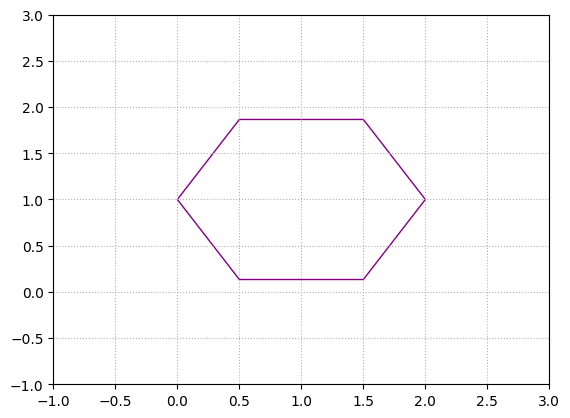

In [237]:
hexagons = list(itertools.islice(gen_hexagon(1, 1, 1), 10))
reference_polygon = [(1, 1), (2, 1), (1.5, 1.866)]

filtered_hexagons = list(flt_polygon_angles_inside(hexagons, reference_polygon))
print("Фигуры, содержащие углы заданного многоугольника:")
visualize_polygons(filtered_hexagons)